In [1]:
from nilearn.maskers import NiftiLabelsMasker

In [2]:
atlas_filename = "/Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/aal116MNI.nii.gz"
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

In [17]:
"sub-01_ses-104_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"[:14]

'sub-01_ses-104'

In [4]:
fmri_filenames = "/Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/sub-01_ses-104_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
time_series = masker.fit_transform(fmri_filenames)

[NiftiLabelsMasker.wrapped] loading data from /Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/aal116MNI.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/sub-01_ses-104_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
<nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x11f859010>, { 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': '/Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/aal116MNI.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  'strategy': 'mean',
  't_r': None,
  '

In [7]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [12]:
# Define the path to the text file
file_path = '/Users/gustxsr/Documents/Stanford/PoldrackLab/GNN_project/aal116NodeNames.txt'

# Read the text file and convert it to a list
with open(file_path, 'r') as file:
    labels = file.readlines()

# Remove any trailing newline characters from each line
labels = [line.strip() for line in labels]

print(labels)

['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusiform_R', 'Po

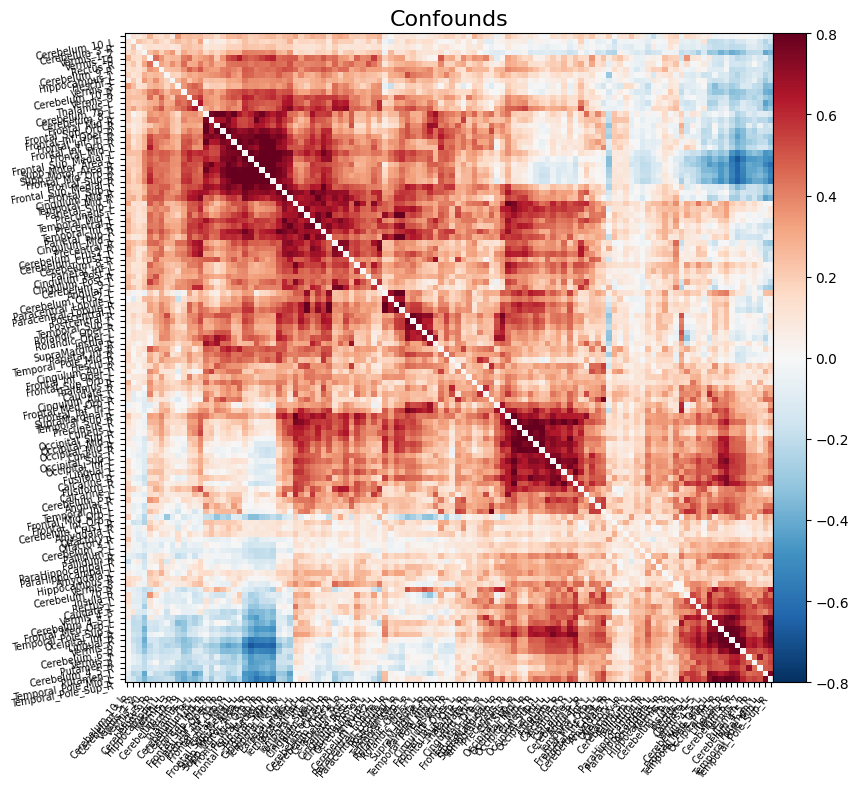

In [13]:
# Plot the correlation matrix
import numpy as np
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels,
    vmax=0.8,
    vmin=-0.8,
    title="Confounds",
    reorder=True,
)

In [14]:
correlation_matrix

array([[ 0.        ,  0.8301007 ,  0.49944946, ...,  0.22055885,
         0.31496224,  0.14844108],
       [ 0.8301007 ,  0.        ,  0.5947971 , ...,  0.0863449 ,
         0.2911759 ,  0.15936403],
       [ 0.4994495 ,  0.594797  ,  0.        , ...,  0.05296754,
         0.57738465,  0.40528932],
       ...,
       [ 0.22055885,  0.0863449 ,  0.05296754, ...,  0.        ,
         0.20070076, -0.0308928 ],
       [ 0.3149622 ,  0.2911759 ,  0.5773847 , ...,  0.20070076,
         0.        ,  0.30207506],
       [ 0.14844108,  0.15936403,  0.4052893 , ..., -0.0308928 ,
         0.3020751 ,  0.        ]], dtype=float32)